# 6. Probability Estimation Modeling

:::{admonition} Course Website
[Link to Course Website](http://54.243.252.9/ce-3354-webroot/)
:::



---
## Readings

1. [Chow, V.T., Maidment,D.M., and Mays, L.W. (1998) Applied Hydrology, McGraw Hill, (Read pages 26 to 31; 416 to 423)](http://54.243.252.9/ce-3354-webroot/3-Readings/CMM1988/) 

2. [Gupta, R.S., 2017. Hydrology and Hydraulic Systems, pp 423-442](https://www.waveland.com/browse.php?t=384)

3. [McCuen, R.H., Johnson, P.A., and Ragan, R.M. (2002) Highway Hydrology. HDS-2 (2ed) FHWA-NHI-02-001 (Read pages 3-1 to 3-5; 4-86 to 4-89; 5-1 to 5-8; 5-16 to 5-17)](http://54.243.252.9/ce-3354-webroot/3-Readings/FHWAHighwayHydrology/FHWA-NHI-02-001.pdf)

4. [Texas Hydraulic Design Manual (2014-1) Texas Department of Transportation. (2014) Hydraulic Design Manual (Read pages 4-1 to 4-5; 4-31 to 4-35)](http://54.243.252.9/ce-3354-webroot/3-Readings/TXDOT-HYDM-2014/txdot-hdm-2014.pdf)

5. [Linear Theory of Hydrologic Systems Dooge, J.C. I. (1973) Linear Theory of Hydrologic Systems. USDA ARS Technical Bulletin No. 1468. (Read pages 127 to 147)](http://54.243.252.9/ce-3354-webroot/3-Readings/LS1973/linear-systems-hydrology-dooge.pdf)

6. [Cleveland, T. G. (2006) *Engineering Hydrology Notes to Accompany CIVE 6361 (Probability Estimation Modeling Part I)*, Department of Civil and Environmental Engineering, University of Houston.](http://54.243.252.9/ce-3354-webroot/ce-3354-webbook-2024/my3354notes/lessons/06-ProbabilityEstimation/cive6361_week_006_A.pdf)

7. [Cleveland, T. G. (2006) *Engineering Hydrology Notes to Accompany CE 3354 (Probability Estimation Modeling Part II)*, Department of Civil and Environmental Engineering, University of Houston.](http://54.243.252.9/ce-3354-webroot/ce-3354-webbook-2024/my3354notes/lessons/06-ProbabilityEstimation/cive6361_week_006_B.pdf)

8. [Cleveland, T. G. (2017) *Engineering Hydrology Notes to Accompany CE 3354 (Discrete Data Analysis; Risk Based Design; Regression Equations)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2017/Lecture05.pdf)

9. [Cleveland, T. G. (2017) *Engineering Hydrology Notes to Accompany CE 3354 (Probability Estimation Modeling)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/ce-3354-webbook-2024/my3354notes/lessons/06-ProbabilityEstimation/Lecture06-2015.pdf)

10. [Cleveland, T. G. (2017) *Engineering Hydrology Notes to Accompany CE 3354 (Point Precipitation; Design Storms)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2017/Lecture08.pdf)

11. [Cleveland, T. G. (2020) *Engineering Hydrology Notes to Accompany CE 3354 (Probability Estimation Modeling)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/ce-3354-webbook-2024/my3354notes/lessons/06-ProbabilityEstimation/Lecture06-2020.pdf)

## Videos



## Outline
- Hydrologic Statistics
- Probability Estimation Models
- Specialized Software

## Hydrologic Statistics and Probability Estimation Modeling

Most textbooks, including Gupta spend some time reviewing statistics and probability concepts. The link that follows is a quick refresher of important measures of data: [Descriptive Statistics](http://54.243.252.9/engr-1330-webroot/engr1330jb/_build/html/lessons/lesson17/lesson17.html)

:::{note}
Time-series (where serial correlation is important) share these measures but other tools are used to make prediction engines.  These tools are somewhat outside the scope of this course.
:::

---
### Probability Estimation Modeling

Probability estimation modeling is the use of probability distributions (population data models) to model or explain behavior in observed (sample data) values.  Once a particular distribution is selected, then the concept of risk (probability) can be explored for events of varying magnitudes.

Two important “extremes” in engineering:

- Uncommon (rare) events (floods, nuclear plant explosions, etc.)

- Common, almost predictable events (routine discharges, traffic accidents at a dangerous intersection, network failure on a due date, etc.)

The probability distribution is just a model of the data, like a trend line for deterministic behavior; different distributions have different shapes, and domains and can explain certain types of observations better than others.

Some Useful Distributions (data models) include:

- Normal
- LogNormal
- Gamma
- Weibull
- Extreme Value (Gumbell)
- Beta

There are many more; they all have the common property that they integrate to unity on the domain $-\infty~to ~ \infty$.  

The probability distributions (models) are often expressed as a density function or a cumulative distribution function. 

:::{note}
A large part of what follows is adapted from [Theodore G. Cleveland, Farhang Forghanparast (2021), Computational Thinking and Data Science: Instructor’s Notes for ENGR 1330 at TTU, with contributions by: Dinesh Sundaravadivelu Devarajan, Turgut Batuhan Baturalp (Batu), Tanja Karp, Long Nguyen, and Mona Rizvi. Whitacre College of Engineering](http://54.243.252.9/engr-1330-webroot/engr1330jb/_build/html/lessons/lesson25/lesson25.html) with some changes to be hydrologically relevant.  The example data file is supplied as part of a homework exercise and is linked at [http://54.243.252.9/ce-3354-webroot/ce-3354-webbook-2024/my3354notes/lessons/06-ProbabilityEstimation/beargrass.txt](http://54.243.252.9/ce-3354-webroot/ce-3354-webbook-2024/my3354notes/lessons/06-ProbabilityEstimation/beargrass.txt)
:::


In [5]:
import math

def normdensity(x,mu,sigma):
    weight = 1.0 /(sigma * math.sqrt(2.0*math.pi))
    argument = ((x - mu)**2)/(2.0*sigma**2)
    normdensity = weight*math.exp(-1.0*argument)
    return normdensity

def normdist(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

In [6]:
# Standard Normal

mu = 0
sigma = 1

x = []
ypdf = []
ycdf = []

xlow = -10
xhigh = 10
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdensity(xlow + i*xstep,mu,sigma)
    ypdf.append(yvalue)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue)  

#x
#ypdf
#ycdf

Make the plot below, nothing too special just yet. Plots of the density (in blue) and cumulative density (probability) in red.

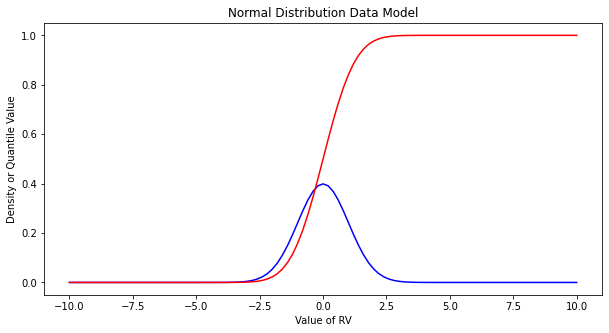

In [7]:
import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.plot(x, ypdf, color ='blue') 
matplotlib.pyplot.plot(x, ycdf, color ='red') 
matplotlib.pyplot.xlabel("Value of RV") 
matplotlib.pyplot.ylabel("Density or Quantile Value") 
matplotlib.pyplot.title("Normal Distribution Data Model") 
matplotlib.pyplot.show() 

### Exceedence Probability 

The purpose of distributions is to model data and allow us to estimate an answer to the question, what is the probability that we will observe a value of the random variable less than or equal to some sentinel value.  A common way to plot the quantile function is with accumulated probability on the horizontal axis, and random variable value on the vertical axis.
Consider the figure below;

![](http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/1-Lessons/Lesson13/PsuedoLesson/exceedence.png)

The RV Value is about 50,000 indicated by the horizontal magenta line.  
The blue curve is some data model, for instance one of our distributions below.
The accumulated probability value at 50,000 is 0.1 or roughly 10% chance, but we also have to stipulate whether we are interested in less than or greater than.  

In the figure shown, $P(x <= 50,000)~ =~1.00~-~0.1~= 0.9~or~90\%$ and is a non-exceedence probability. In words we would state 
"The probability of observing a value less than or equal to 50,000 is 90%" the other side of the vertical line is the exceedence probability; in the figure $P(x > 50,000)~=~0.1~or~10\%$.  In words we would state "The probability of observing a value equal to or greater than 50,000 is 10%."  In risk analysis the sense of the probability is easily confusing, so when you can - make a plot.  Another way to look at the situation is to simply realize that the blue curve is the quantile function $F(X)$ with $X$ plotted on the vertical axis, and $F(X)$ plotted on the horizontal axis.

Now lets put these ideas to use.  We will sample from the population of integers from 0 to 100, with replacement.  Any single pull from the population is equally likely. Lets take 25 samples (about 1/4 of the total population - usually we dont know the size of the population).

In [8]:
import numpy

population = []
for i in range(0,101,1):
    population.append(i)
    
sample = numpy.random.choice(population,25)

In [9]:
# lets get some statistics
sample_mean = sample.mean()
sample_variance = sample.std()**2

In [10]:
# sort the sample in place!
sample.sort()
# built a relative frequency approximation to probability, assume each pick is equally likely
weibull_pp = []
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))

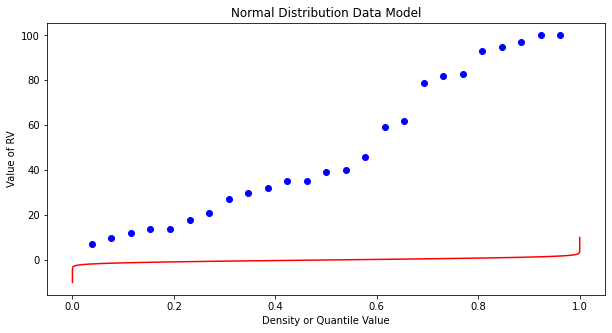

In [11]:
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(weibull_pp, sample, color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.ylabel("Value of RV") 
matplotlib.pyplot.xlabel("Density or Quantile Value") 
matplotlib.pyplot.title("Normal Distribution Data Model") 
matplotlib.pyplot.show() 

What a horrible plot, but lets now use the sample statistics to "fit" the data model (red) to the observations (blue). Notice we have already rotated the axes so this plot and ones that follow are structured like the "Exceedence" plot above.

In [12]:
# Fitted Model

mu = sample_mean
sigma = math.sqrt(sample_variance)

x = []
ycdf = []

xlow = 0
xhigh = 100
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 

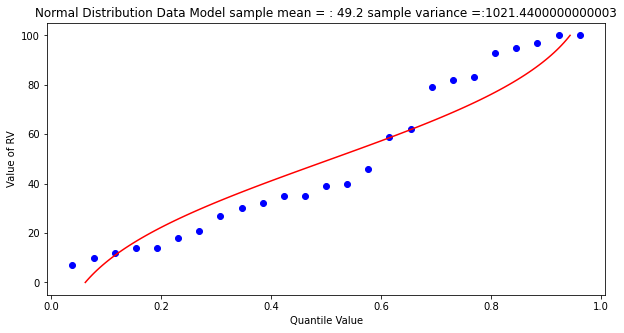

In [13]:
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(weibull_pp, sample,  color ='blue') 
matplotlib.pyplot.plot(ycdf, x,  color ='red') 
matplotlib.pyplot.ylabel("Value of RV") 
matplotlib.pyplot.xlabel("Quantile Value") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(sample_mean)+ " sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

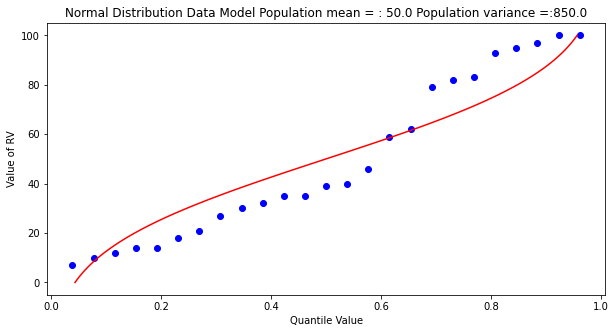

In [14]:
popmean = numpy.array(population).mean()
popvar = numpy.array(population).std()**2
# Fitted Model

mu = popmean
sigma = math.sqrt(popvar)

x = []
ycdf = []

xlow = 0
xhigh = 100
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 

    
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(weibull_pp, sample, color ='blue') 
matplotlib.pyplot.plot(ycdf, x,  color ='red') 
matplotlib.pyplot.ylabel("Value of RV") 
matplotlib.pyplot.xlabel("Quantile Value") 
mytitle = "Normal Distribution Data Model Population mean = : " + str(popmean)+ " Population variance =:" + str(popvar)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

Some observations are in order:

- The population is a uniformly distributed collection. 
- By random sampling, and keeping the sample size small, the sample distribution appears approximately normal.  

Real things of engineering interest are not always bounded as shown here, the choice of the Weibull plotting position is not arbitrary.  The blue dot scatterplot in practice is called the empirical distribution function, or empirical quantile function.   

Now we will apply these ideas to some realistic data.

### Beargrass Creek

The file `beargrass.txt` contains annual peak flows for Beargrass Creek.  The year is a water year, so the peaks occur on different days in each year; thus it is not a time series. Let's examine the data and see how well a Normal distribution data model fits, then estimate from the distribution the peak magnitude with exceedence probability 0.01 (1%-chance that will observe a value equal to or greater).

In [15]:
import pandas
beargrass = pandas.read_csv('beargrass.txt')  #Reading a .csv file
beargrass.head()

,Year,Peak
0,1945,1810
1,1946,791
2,1947,839
3,1948,1750
4,1949,898


<AxesSubplot:>

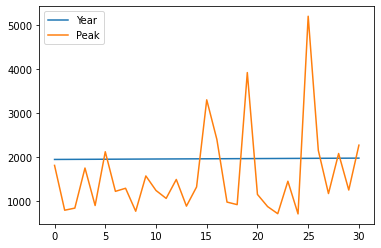

In [17]:
beargrass.plot()

 Now we will just copy code (the miracle of cut-n-paste!)

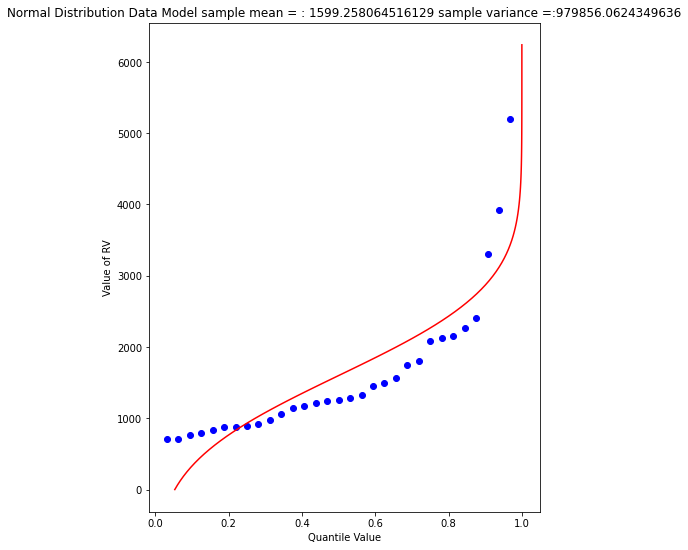

In [18]:
sample = beargrass['Peak'].tolist() # put the peaks into a list
sample_mean = numpy.array(sample).mean()
sample_variance = numpy.array(sample).std()**2
sample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(sample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(sample_mean)+ " sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [19]:
beargrass['Peak'].describe()

count      31.000000
mean     1599.258065
std      1006.239500
min       707.000000
25%       908.000000
50%      1250.000000
75%      1945.000000
max      5200.000000
Name: Peak, dtype: float64

A 1% chance exceedence is on the right side of the chart, it is the compliment of 99% non-exceedence, in terms of our quantile function we want to find the value $X$ that returns a quantile of 0.99.

In [20]:
myguess = 6000
print(mu,sigma)
print(normdist(myguess,mu,sigma))

1599.258064516129 989.8767915427474
0.9999956206542673


In [21]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    mu = 1599.258064516129
    sigma = 989.8767915427474
    quantile = 0.99999
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))


5820.974479887303


So a peak discharge of 4000 or so is expected to be observed with 1% chance, notice we took the value from the fitted distribution, not the empirical set.  As an observation, the Normal model is not a very good data model for these observations.

### Log-Normal

Another data model we can try is log-normal, where we stipulate that the logarithms of the observations are normal.  The scripts are practically the same, but there is an inverse transformation required to recover original value scale.  Again we will use Beargrass creek.  

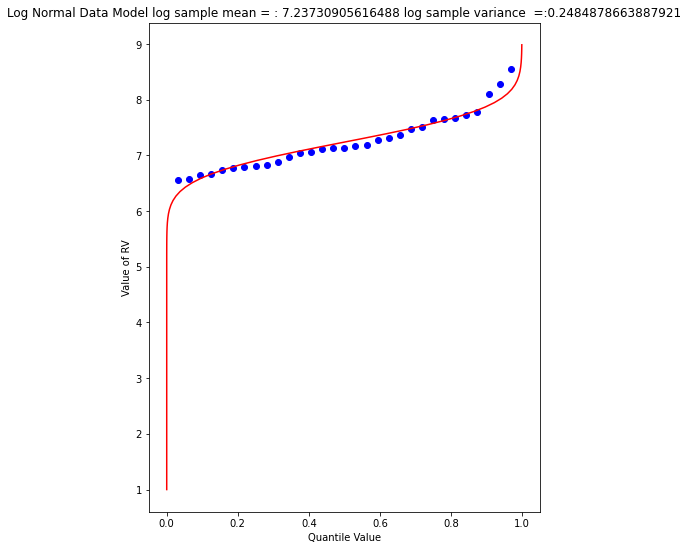

In [22]:
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))

logsample = beargrass['Peak'].apply(loggit).tolist() # put the peaks into a list
sample_mean = numpy.array(logsample).mean()
sample_variance = numpy.array(logsample).std()**2
logsample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model in Log Space
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(logsample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, logsample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Normal Data Model log sample mean = : " + str(sample_mean)+ " log sample variance  =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

The plot doesn't look too bad, but we are in log-space, which is hard to interpret, so we will transform back to arithmetic space 

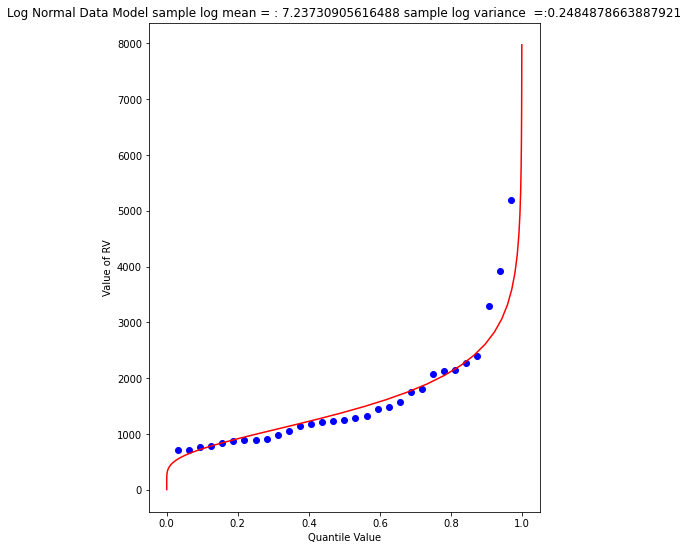

In [23]:
def antiloggit(x):  # A prototype function to log transform x
    return(math.exp(x))

sample = beargrass['Peak'].tolist() # pull original list
sample.sort() # sort in place
################
mu = sample_mean # Fitted Model in Log Space
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(logsample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(antiloggit(xlow + i*xstep))
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Normal Data Model sample log mean = : " + str((sample_mean))+ " sample log variance  =:" + str((sample_variance))
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

Visually a better data model, now lets determine the 1% chance value.

In [24]:
myguess = 4440
print(mu,sigma)
print(normdist(loggit(myguess),mu,sigma)) # mu, sigma already in log space - convert myguess

7.23730905616488 0.4984855728993489
0.9900772507418302


In [25]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    mu = 7.23730905616488
    sigma = 0.4984855728993489
    quantile = 0.99
    argument = (loggit(x) - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))

4433.567789173262


Now we have a decent method, we should put stuff into functions to keep code concise, lets examine a couple more data models

### Gumbell (Double Exponential) Distribution

The Gumbell is also called the Extreme-Value Type I distribution, the density and quantile function are:

$$ \text{pdf(x)} = \frac{1}{\beta} \cdot exp [-\frac{(x-\alpha)}{\beta} - exp (-\frac{(x-\alpha)}{\beta}) ]$$

$$ F(X) =  \int_{-\infty}^X{\frac{1}{\beta} \cdot exp [-\frac{(x-\alpha)}{\beta} - exp (-\frac{(x-\alpha)}{\beta}) ] dx} = exp [- exp (-\frac{(X-\alpha)}{\beta})] $$

The distribution has two parameters, $\alpha$ and $\beta$, which in some sense play the same role as mean and variance. Lets modify our scripts further to see how this data model performs on the Bearcreek data.

Of course we need a way to estimate the parameters, a good approximation can be obtained using:

$$ \alpha = \mu \cdot \frac{\sqrt{6}}{\pi} $$

and

$$ \beta = 0.45 \cdot \sigma $$

where $\mu$ and $\sigma^2$ are the sample mean and variance.

In [26]:
def ev1dist(x,alpha,beta):
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist

Now literally substitute into our prior code!

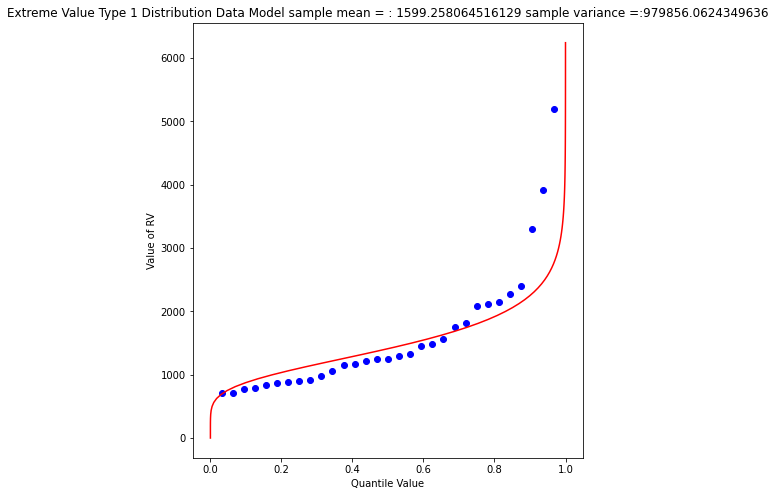

In [27]:
sample = beargrass['Peak'].tolist() # put the peaks into a list
sample_mean = numpy.array(sample).mean()
sample_variance = numpy.array(sample).std()**2
alpha_mom = sample_mean*math.sqrt(6)/math.pi
beta_mom = math.sqrt(sample_variance)*0.45
sample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(sample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = ev1dist(xlow + i*xstep,alpha_mom,beta_mom)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Extreme Value Type 1 Distribution Data Model sample mean = : " + str(sample_mean)+ " sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

Again a so-so visual fit.
To find the 1% chance value

In [28]:
myguess = 3300
print(alpha_mom,beta_mom)
print(ev1dist(myguess,alpha_mom,beta_mom)) # 

1246.9363972503857 445.4445561942363
0.990087892543188


In [29]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    alpha = 1246.9363972503857
    beta = 445.4445561942363
    quantile = 0.99
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist - quantile

print(newton(f, myguess))

3296.0478279991366


### Gamma Distribution (as Pearson Type 3)

One last data model to consider is one that is specifically **stipulated for use by federal agencies for probability estimation of extreme hydrologic events**.  The data model ia called the Log-Pearson Type III distribution, its actually a specific case of a Gamma distrubution.  

This example we will dispense with tyring to build it in python primative, and just use a package - the density function is not all that hard, but the quantile function is elaborate.  

Learn more at [http://54.243.252.9/engr-1330-webroot/3-Readings/NumericalRecipesinF77.pdf](http://54.243.252.9/engr-1330-webroot/3-Readings/NumericalRecipesinF77.pdf) (in particular around Page 276)

As usual, lets let Google do some work for us, using the search term "gamma quantile function; scipy" we get to this nice blog entry [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html) which is a good start. 

A Pearson Type III data model has the following density function:

$$ f(x|\tau,\alpha,\beta) = \frac{(\frac{x-\tau}{\beta})^{\alpha -1}\cdot exp( - \frac{x-\tau}{\beta})}{|\beta| \Gamma(\alpha)}$$

If we make some substitutions:
$ \lambda = \frac{1}{\beta} ; \hat{x} = x -\tau $ then the density function is

$$ f(\hat{x}) = \frac{ 1}{\Gamma(\alpha)} (\lambda \hat{x})^{\alpha -1}\cdot exp( - \lambda \hat{x} )$$

which is now a one parameter Gamma density function just like the example in the link.

Reading a little from [http://54.243.252.9/ce-3354-webroot/3-Readings/Bulletin17C/Bulletin17C-tm4b5-draft-ACWI-17Jan2018.pdf](http://54.243.252.9/ce-3354-webroot/3-Readings/Bulletin17C/Bulletin17C-tm4b5-draft-ACWI-17Jan2018.pdf) we can relate the transformations to descriptive statistics (shown below without explaination) as:

$\mu = \text{sample mean}$,

$\sigma = \text{sample standard deviation}$, 

$\gamma = \text{sample skew coefficient} = (\frac{n}{\sigma^3(n-1)(n-2)})\sum_{i=1}^n(x_i - \mu)^3 $

$\alpha = \frac{4}{\gamma^2}$  

$\beta = sign(\gamma)\sqrt{\frac{\sigma^2}{\alpha}}$

$\tau = \mu - \alpha \cdot \beta$

So we have a bit of work to do.  The name of the functions in `scipy` we are interested in are `gamma.pdf(x,a)` and `gamma.cdf(x,a)`  So lets build a tool to generate a Log-Pearson Type III data model, then apply it to Beargrass Creek.  We will use a lot of glue here.

First load in dependencies, and define support functions we will need 

In [30]:
import scipy.stats # import scipy stats package
import math        # import math package
import numpy       # import numpy package
# log and antilog
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))
def antiloggit(x):  # A prototype function to log transform x
    return(math.exp(x))
def weibull_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    weibull_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        weibull_pp.append((i+1)/(len(sample)+1))
    return weibull_pp


Then the gamma distribution from scipy, modified for our type of inputs.

In [31]:
def gammacdf(x,tau,alpha,beta): # Gamma Cumulative Density function - with three parameter to one parameter convert
    xhat = x-tau
    lamda = 1.0/beta
    gammacdf = scipy.stats.gamma.cdf(lamda*xhat, alpha)
    return gammacdf

Then load in the data from the data frame, log transform and generate descriptive statistics.

In [32]:
#sample = beargrass['Peak'].tolist() # put the peaks into a list
sample = beargrass['Peak'].apply(loggit).tolist() # put the log peaks into a list
sample_mean  = numpy.array(sample).mean()
sample_stdev = numpy.array(sample).std()
sample_skew  = 3.0 # scipy.stats.skew(sample)
sample_alpha = 4.0/(sample_skew**2)
sample_beta  = numpy.sign(sample_skew)*math.sqrt(sample_stdev**2/sample_alpha)
sample_tau   = sample_mean - sample_alpha*sample_beta

Now generate plotting positions for the sample observations

In [33]:
plotting = weibull_pp(sample)

Now generate values for the data model (for plotting our red line "fit"), set limits to be a little beyond the sample range.

In [34]:
x = []; ycdf = []
xlow = (0.9*min(sample)); xhigh = (1.1*max(sample)) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = gammacdf(xlow + i*xstep,sample_tau,sample_alpha,sample_beta)
    ycdf.append(yvalue) 

Now reverse transform back to native scale, and plot the sample values vs plotting position in blue, and the data model in red

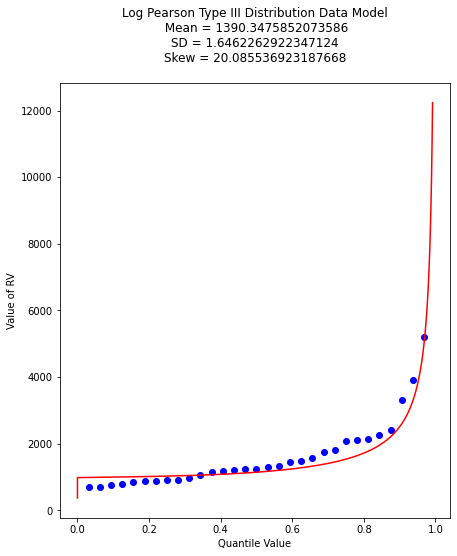

In [35]:
# reverse transform the peaks, and the data model peaks
for i in range(len(sample)):
    sample[i] = antiloggit(sample[i])
for i in range(len(x)):
    x[i] = antiloggit(x[i])
myfigure = matplotlib.pyplot.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(plotting, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Pearson Type III Distribution Data Model\n "
mytitle += "Mean = " + str(antiloggit(sample_mean)) + "\n"
mytitle += "SD = " + str(antiloggit(sample_stdev)) + "\n"
mytitle += "Skew = " + str(antiloggit(sample_skew)) + "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

And as before lets find the value that retruns the 99% quantile - we will just use the newton method above.
First recover the required model parameters. Then we will paste these into the $f(x)$ function for the Newton's method.

In [36]:
print(sample_tau)
print(sample_alpha)
print(sample_beta)

6.904985340898647
0.4444444444444444
0.7477283593490234


In [37]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    sample_tau = 5.976005311346212
    sample_alpha = 6.402272915026134
    sample_beta = 0.1970087438569494
    quantile = 0.9900
    argument = loggit(x)
    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

myguess =  5000
print(newton(f, myguess))

5856.10913158364


Trust, but verify!

In [38]:
round(gammacdf(loggit(5856.109),sample_tau,sample_alpha,sample_beta),4)

0.9753

Now lets summarize our efforts regarding Beargrass Creek annual peaks and probabilities anticipated.

|Data Model|99% Peak Flow|Remarks|
|:---|:---|:---|
|Normal|3902|so-so visual fit|           
|Log-Normal|4433|better visual fit|            
|Gumbell|3296|better visual fit|            
|Log-Pearson III|5856|best (of the set) visual fit|

At this point, now we have to choose our model and then can investigate different questions.  So using LP3 as our favorite, lets now determine anticipated flow values for different probabilities (from the data model) - easy enought to just change the quantile value and rerun the newtons optimizer, for example:

|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |968| First Quartile Divider|           
|50% |1302| Median, and Second Quartile Divider|            
|75% |1860| 3rd Quartile Divider|            
|90% |2706| 10% chance of greater value|
|99% |5856| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|9420| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|11455| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

In [39]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    sample_tau = 5.976005311346212
    sample_alpha = 6.402272915026134
    sample_beta = 0.1970087438569494
    quantile = 0.50
    argument = loggit(x)
    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

myguess =  1000
print(newton(f, myguess))

1302.814639184079


### Empirical Frequency Distributions and Plotting Positions in Hydrologic Data

Empirical Frequency Distributions (EFDs) are essential tools in hydrology for analyzing the occurrence and intensity of various hydrologic events, such as rainfall and streamflow. These distributions are derived directly from observed data, providing a realistic and data-driven understanding of hydrological patterns.

In rainfall data analysis, an EFD involves plotting the observed rainfall amounts against their corresponding frequencies or probabilities. By sorting and counting the occurrences of different rainfall intensities, hydrologists create a distribution that highlights patterns such as the most common rainfall amounts and the probability of extreme rainfall events. This is crucial for designing stormwater management systems, predicting flood risks, and understanding climatic trends.

For streamflow data, an EFD is constructed by analyzing flow rates recorded over time. By organizing and plotting these observed flow values, hydrologists gain insights into river and stream behaviors, such as typical flow conditions and the likelihood of high or low flow events. This information is vital for water resource management, flood forecasting, and ecological conservation.

#### Plotting Positions in Empirical Distributions

Plotting positions (formulas) are used to estimate the probabilities of observed data points within an empirical frequency distribution. These positions help to place data points on a probability scale, facilitating the creation of empirical cumulative distribution functions (CDFs).

Several methods exist for calculating plotting positions, with some of the most common ones being:

**Weibull Plotting Position:**<br>

$P_i=\frac{i}{n+1}$ <br>

where $P_i$ is the plotting position for the i-th ranked observation, i is the rank (with 1 being the smallest value), and n is the total number of observations. The Weibull plotting position is simple and widely used.

**Gringorten Plotting Position:**<br>
    
$P_i=\frac{i-0.44}{n+0.12}$ <br>

This method provides a slight adjustment to the Weibull method, improving the estimation of probabilities, especially for small datasets.

**Hazen Plotting Position:**<br>
    
$P_i=\frac{i-0.5}{n}$ <br>

The Hazen plotting position is another adjustment that centers the probabilities more evenly across the dataset.

**Cunnane Plotting Position:**<br>

$P_i=\frac{i-0.4}{n+0.2}$ <br>

The Cunnane method is often recommended for hydrological studies, as it provides a balance between the Weibull and Gringorten methods.

#### General Application and Interpretation

When creating an empirical frequency distribution, hydrologists first rank the observed data in ascending order. Then, they apply one of the plotting position formulas to each data point to determine its exceedance probability. By plotting these probabilities against the observed values, they generate an empirical CDF, which visually represents the distribution of the data.

This approach helps in identifying the likelihood of various hydrological events, aiding in risk assessment and decision-making. For example, plotting positions can help estimate the return period of extreme rainfall or streamflow events, which is crucial for infrastructure design and floodplain management.

By incorporating plotting positions, empirical frequency distributions become more robust and provide clearer insights into the probabilities of different hydrological events, enhancing the accuracy and reliability of hydrological analyses.

### Annual Duration Series

The Annual Duration Series is a hydrological tool used to analyze the variability and extremities of rainfall and streamflow over time. This series involves selecting specific data points, typically the maximum (or minimum) values, from **each year** within a given period.

For rainfall data, the Annual Duration Series might consist of the **highest daily rainfall recorded each year**. This allows hydrologists to study patterns, identify trends, and estimate the probability of extreme rainfall events, which are crucial for flood forecasting and water resource management.

In the context of streamflow data, the Annual Duration Series often focuses on the peak flow rates (maximum streamflow) observed annually. Analyzing these peak flow rates helps in understanding river behavior, flood risks, and the potential impacts of climate change on water systems.

By examining these annual extremes, researchers can assess the long-term trends and variations in hydrological phenomena, aiding in the development of robust water management strategies and infrastructure designs.

### Partial Duration Series

The Partial Duration Series is a hydrological analysis technique used to capture the frequency and intensity of **substantial** events over a specified period, beyond just the annual maxima. Unlike the Annual Duration Series, which only considers the highest value each year, the Partial Duration Series includes all events exceeding a certain threshold, regardless of their occurrence within the year.

For rainfall data, the Partial Duration Series involves identifying all rainfall events that surpass a predefined intensity threshold. This method allows for a more comprehensive analysis of extreme rainfall events, providing insights into the frequency and distribution of heavy rainfalls. This is particularly useful for designing drainage systems and managing flood risks, as it accounts for multiple significant events within a single year.

In streamflow data, the Partial Duration Series focuses on recording all peak flows that exceed a set flow rate threshold. This approach captures not only the annual peak flows but also other substantial flow events, offering a detailed understanding of river dynamics and flood potential. It is valuable for floodplain management, infrastructure planning, and assessing the impacts of land use changes and climate variability on river systems.

By considering multiple substantial events over time, the Partial Duration Series provides a richer database for statistical analysis and enhances the accuracy of risk assessments and hydrological predictions.

:::{note}
For precipitation data the two series are indistinguishable at 1\% chance, however at lower recurrance intervals, the PDS is thought to be a more useful representation.  You can visualize the difference using the [NOAA PFDS]() website - just pick anywhere.  Have the server generate an IDF diagram using a PDS, screen capture; then repeat using an AMS and compare side-by-side, like the figure below:

![](AMSvPDS.png)

The difference is quite subtle, but apparent on the left side of each plot at the high probability/low recurrence interval side.
:::

## Software

In general practice, engineers use software developed specifically for such analysis because no-one (lawyers and insurance companies) believes homebrew stuff.  The two common tools in hydrology are [USGS PeakFQ](https://water.usgs.gov/software/PeakFQ/) and [USACOE SSP](https://www.hec.usace.army.mil/software/hec-ssp/)

PeakFQ is specifically for flood frequency analysis while SSP is a generalized environment (so probably more general).  The underlying codes are not much different than the examples above, but are ble\$\$ed by the respective agencies.

<!--
Question 1:

Which of the following best describes the Annual Maximum Series (AMS) in frequency analysis?

A) All precipitation events above a certain threshold during a given year
B) The maximum precipitation or streamflow event occurring each year
C) The top 10 highest precipitation events during a year
D) All streamflow events recorded during the wet season of the year
E) The sum of all streamflow events during the year

Correct Answer:
B) The maximum precipitation or streamflow event occurring each year
Question 2:

In the Partial Duration Series (PDS) approach, how are the events chosen for analysis?

A) Only the highest annual precipitation events are selected.
B) All streamflow events above a predefined threshold are included, regardless of the year they occurred.
C) Only the lowest streamflow events are selected over a 10-year period.
D) All streamflow events occurring in a dry season are included.
E) Only streamflow events recorded during extreme droughts are analyzed.

Correct Answer:
B) All streamflow events above a predefined threshold are included, regardless of the year they occurred.
Question 3:

Why is frequency analysis of precipitation or streamflow important in hydrology?

A) To predict daily variations in river flow
B) To understand the frequency of extreme weather events for flood risk management
C) To measure annual rainfall totals across different regions
D) To calculate the amount of evaporation from reservoirs
E) To analyze seasonal temperature trends in different climates

Correct Answer:
B) To understand the frequency of extreme weather events for flood risk management
Question 4:

Which statistical distribution is commonly used in frequency analysis of extreme events like floods?

A) Poisson Distribution
B) Normal Distribution
C) Exponential Distribution
D) Gumbel Distribution
E) Uniform Distribution

Correct Answer:
D) Gumbel Distribution
Question 5:

What is one advantage of using the Partial Duration Series (PDS) over the Annual Maximum Series (AMS)?

A) PDS includes more frequent low-flow events that occur each year.
B) PDS captures all events during dry seasons, making it useful for drought analysis.
C) PDS allows for a greater number of extreme events to be analyzed in any given period, not just the annual maximum.
D) PDS focuses only on the seasonal variability of precipitation.
E) PDS excludes all events that occur below the median streamflow threshold.

Correct Answer:
C) PDS allows for a greater number of extreme events to be analyzed in any given period, not just the annual maximum.

These questions cover key concepts of AMS and PDS and their significance in frequency analysis for precipitation and streamflow.
-->